In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

In [2]:
df = pd.read_table(
    'https://raw.githubusercontent.com/sinanuozdemir/sfdat22/master/data/sms.tsv',
    sep='\t',
    header=None,
    names=['label', 'msg'])
df.to_excel('sms.xlsx',index=False)

In [3]:
df=pd.read_excel('sms.xlsx',index=False)

In [4]:
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


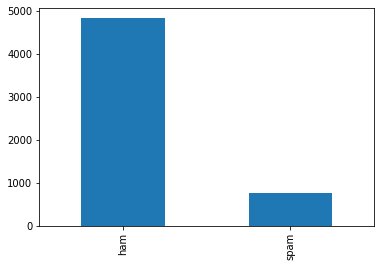

In [5]:
df.label.value_counts().plot(kind='bar')

In [6]:
df.label.value_counts()/df.label.shape[0]

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [7]:
df['meg']= df.msg.apply(lambda x:x.lower())

In [8]:
df.head()

,label,msg,meg
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
train_simple = ['call you tonight',
               'Call me a cab',
               'please call me ... PLEASE 44!']
vect = CountVectorizer()
train_simple_dtm =vect.fit_transform(train_simple)
pd.DataFrame(train_simple_dtm.toarray(),columns=vect.get_feature_names())

,44,cab,call,me,please,tonight,you
0,0,0,1,0,0,1,1
1,0,1,1,1,0,0,0
2,1,0,1,1,2,0,0


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.meg,df.label,random_state=9)

In [11]:
vect = CountVectorizer()
train_dtm=vect.fit_transform(x_train)
train_dtm

<4179x7508 sparse matrix of type '<class 'numpy.int64'>'
	with 55539 stored elements in Compressed Sparse Row format>

In [12]:
test_dtm=vect.transform(x_test)
test_dtm

<1393x7508 sparse matrix of type '<class 'numpy.int64'>'
	with 17302 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
preds = nb.predict(test_dtm)
preds

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [14]:
from sklearn import metrics
print(r'accuracy=',metrics.accuracy_score(y_test,preds))
print(metrics.confusion_matrix(y_test,preds))

accuracy= 0.9813352476669059
[[1188    8]
 [  18  179]]


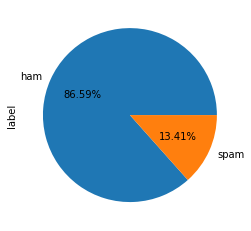

In [19]:
df.label.value_counts().plot.pie(autopct = '%1.2f%%')